# Исследование объявлений о продаже квартир

На данных сервиса с объявлениями о недвижимости Санкт-Петербурга и прилегающих населенных пунктов за несколько лет необходимо определить рыночную стоимость объектов недвижимости. Задача - установить параметры, что позволит автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Виды данных:
   * данные, введенные  пользователем
   * данные, полученные автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма и другие)
   
**Ход исследование:**

1.  Изучение данных
2.  Предобработка данных
3.  Расчёты и добавление результатов в таблицу
4.  Исследовательский анализ данных

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('/datasets/real_estate_data.csv')
display(data)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
...,...
23694,9\t9700000.0\t133.81\t2017-03-21T00:00:00\t3\t...
23695,14\t3100000.0\t59.0\t2018-01-15T00:00:00\t3\t\...
23696,18\t2500000.0\t56.7\t2018-02-11T00:00:00\t2\t\...
23697,13\t11475000.0\t76.75\t2017-03-28T00:00:00\t2\...


In [2]:
# разделим столбцы символом \t 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
# изучим данные 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# поменяем порядок столбцов для удобства 
columns_titles = [
    
    'first_day_exposition',
    'days_exposition',
    'total_images', 
    'last_price',
    
    'rooms', 
    'total_area', 
    'living_area',
    'kitchen_area', 
    'floor',
    'floors_total', 
    'balcony',
    'ceiling_height', 
    
    'is_apartment', 
    'studio', 
    'open_plan', 
    
    'locality_name', 
    'airports_nearest', 
    'cityCenters_nearest',
    'parks_around3000', 
    'parks_nearest', 
    'ponds_around3000',
    'ponds_nearest', 
    
]
data = data.reindex(columns = columns_titles)
data.columns

Index(['first_day_exposition', 'days_exposition', 'total_images', 'last_price',
       'rooms', 'total_area', 'living_area', 'kitchen_area', 'floor',
       'floors_total', 'balcony', 'ceiling_height', 'is_apartment', 'studio',
       'open_plan', 'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest'],
      dtype='object')

In [7]:
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,2019-03-07T00:00:00,NaN,20,13000000.0,3,108.00,51.0,25.00,8,16.0,...,NaN,False,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,2018-12-04T00:00:00,81.0,7,3350000.0,1,40.40,18.6,11.00,1,11.0,...,NaN,False,False,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,2015-08-20T00:00:00,558.0,10,5196000.0,2,56.00,34.3,8.30,4,5.0,...,NaN,False,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,2015-07-24T00:00:00,424.0,0,64900000.0,3,159.00,NaN,NaN,9,14.0,...,NaN,False,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,2018-06-19T00:00:00,121.0,2,10000000.0,2,100.00,32.0,41.00,13,14.0,...,NaN,False,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21T00:00:00,NaN,9,9700000.0,3,133.81,73.3,13.83,3,5.0,...,NaN,False,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,2018-01-15T00:00:00,45.0,14,3100000.0,3,59.00,38.0,8.50,4,5.0,...,NaN,False,False,Тосно,NaN,NaN,NaN,NaN,NaN,NaN
23696,2018-02-11T00:00:00,NaN,18,2500000.0,2,56.70,29.7,NaN,1,3.0,...,NaN,False,False,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN
23697,2017-03-28T00:00:00,602.0,13,11475000.0,2,76.75,NaN,23.30,12,17.0,...,NaN,False,False,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0


In [8]:
print('ЧИСЛО ФОТОГРАФИЙ', data['total_images'].unique())
print()
print('ЧИСЛО КОМНАТ', data['rooms'].unique())
print()
print('ВСЕГО ЭТАЖЕЙ', data['floors_total'].unique())
print()
print('ЭТАЖ', data['floor'].unique())
print()
print('ЧИСЛО БАЛКОНОВ', data['balcony'].unique())
print()
print('АПАРТАМЕНТЫ', data['is_apartment'].unique())
print()
print('СТУДИЯ', data['studio'].unique())
print()
print('СВОБОДНАЯ ПЛАНИРОВКА', data['open_plan'].unique())
print()
print('КОЛИЧЕСТВО КОМНАТ', data['rooms'].unique())
print()
print('КОЛИЧЕСТВО ПАРКОВ в радиусе 3км', data['parks_around3000'].unique())
print()
print('КОЛИЧЕСТВО ВОДОЕМОВ в радиусе 3км', data['ponds_around3000'].unique())

ЧИСЛО ФОТОГРАФИЙ [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

ЧИСЛО КОМНАТ [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

ВСЕГО ЭТАЖЕЙ [16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]

ЭТАЖ [ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]

ЧИСЛО БАЛКОНОВ [nan  2.  0.  1.  5.  4.  3.]

АПАРТАМЕНТЫ [nan False True]

СТУДИЯ [False  True]

СВОБОДНАЯ ПЛАНИРОВКА [False  True]

КОЛИЧЕСТВО КОМНАТ [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

КОЛИЧЕСТВО ПАРКОВ в радиусе 3км [ 1.  0.  2. nan  3.]

КОЛИЧЕСТВО ВОДОЕМОВ в радиусе 3км [ 2.  0.  3.  1. nan]


### Вывод

После вывода уникальных значений по некоторым столбцам (выводились не все, т.к. бессмысленно выводить уникальные значения расстояний до центра, до парка, цену, населенный пункт, их будет слишком много) появились некоторые закономерности. 
- В числе фотографий, в числе комнат и в этаже нет пропусков, тип данных правильный
- В общем количестве этажей, в числе балконов, в количестве парков и водоемов есть пропуски, а также неверный тип данных. Приведем к целым значениям, а не к вещественным. Пропуски в общем кол-ве этажей и в этаже заменим на 0, пропуски в балконах заменим на 0.
- В апартаментах также есть пропуски nan (здесь скорее всего пропуск означает, что данный элемент не является апартаментом, изменим на False
- В студии и свободной планировке ошибок и пропусков нет.

## Предобработка данных

***Гипотезы относительно причин появления пропусков в данных***

Пропуски есть в следующих столбцах и по следующим, как кажется, причинам:
- Всего этажей: либо пользователь не указал это число, либо квартира могла быть в одноэтажном доме.
- Число балконов: либо пользователь не указал число, либо попросту балконов в квартире нет и их число 0.
- Апартаменты: либо квартира не является апартаментом, и можно заменить на False, либо пользователь не указал информацию
- Кол-во парков и кол-во водоёмов: аналогично, либо не указано, либо 0.

В данных можно провести следующие изменения:
- В дате публикации везде написано одинаковое время 00:00:00, следовательно, можем это убрать для удобства
- Total_area, kichen_area и living_area округлим до целых и избавимся от вещественного типа данных

Далее будем избавляться от пропусков

In [9]:
# поменяем тип записи даты в столбце first_day_exposition, и так как везде время 00:00:00, избавимся от него
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
display(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [10]:
# в столбце days_exposition означают, скорее всего, что объявление еще не снято в публикации, посмотрим эти строки
display(data[data['days_exposition'].isna()])

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.0,25.00,8,16.0,...,NaN,False,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
7,2019-04-18,NaN,5,7915000.0,2,71.60,NaN,18.90,22,24.0,...,NaN,False,False,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN
44,2018-11-18,NaN,13,5350000.0,1,40.00,NaN,NaN,3,22.0,...,NaN,False,False,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0
45,2018-12-02,NaN,17,5200000.0,2,50.60,30.3,7.00,7,9.0,...,NaN,False,False,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN
46,2019-01-31,NaN,17,6600000.0,2,52.10,29.7,8.30,9,24.0,...,NaN,False,False,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,2018-11-02,NaN,20,21400000.0,4,145.00,71.4,15.60,17,26.0,...,NaN,False,False,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN
23685,2019-01-24,NaN,15,2490000.0,1,31.00,17.3,5.60,5,5.0,...,NaN,False,False,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.3,13.83,3,5.0,...,NaN,False,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.7,NaN,1,3.0,...,NaN,False,False,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# total_area, kichen_area и living_area проверим на пропуски
# начнем с total_area
display(data[data['total_area'].isna()])

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest


In [12]:
# пропусков в total_area, проверим, какие значения встречаются чаще всего, и нет ли выбросов
print(data['total_area'].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [13]:
print(data['living_area'].describe())
display(data[data['living_area'].isna()])

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
3,2015-07-24,424.0,0,64900000.0,3,159.00,NaN,NaN,9,14.0,...,NaN,False,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
7,2019-04-18,NaN,5,7915000.0,2,71.60,NaN,18.9,22,24.0,...,NaN,False,False,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN
30,2018-02-19,63.0,12,2200000.0,1,32.80,NaN,NaN,2,9.0,...,NaN,False,False,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN
37,2017-10-28,196.0,10,1990000.0,2,45.80,NaN,NaN,1,5.0,...,NaN,False,False,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN
44,2018-11-18,NaN,13,5350000.0,1,40.00,NaN,NaN,3,22.0,...,NaN,False,False,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,2018-07-03,60.0,14,5950000.0,3,80.30,NaN,NaN,5,12.0,...,NaN,False,False,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0
23663,2018-01-12,59.0,12,6400000.0,4,88.00,NaN,NaN,1,10.0,...,NaN,False,False,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0
23670,2018-02-08,45.0,9,2450000.0,1,45.60,NaN,NaN,2,9.0,...,NaN,False,False,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN
23679,2017-12-08,45.0,0,2500000.0,1,35.00,NaN,NaN,4,9.0,...,NaN,False,False,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# заменим на среднее значение пропуски в living_area
data_living_area_grouped = data.groupby('rooms')['living_area'].mean()

def func(row):
    if pd.isna(row['living_area']):
        return data_living_area_grouped.loc[row['rooms']]
    return row['living_area']
 
data['living_area'] = data.apply(func, axis=1)
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.00,8,16.0,...,NaN,False,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.00,1,11.0,...,NaN,False,False,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.30,4,5.0,...,NaN,False,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,NaN,9,14.0,...,NaN,False,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.00,13,14.0,...,NaN,False,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.83,3,5.0,...,NaN,False,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.50,4,5.0,...,NaN,False,False,Тосно,NaN,NaN,NaN,NaN,NaN,NaN
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,NaN,1,3.0,...,NaN,False,False,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.30,12,17.0,...,NaN,False,False,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0


In [15]:
# проверяем kitchen_area на пропуски
print(data['kitchen_area'].describe())
display(data[data['kitchen_area'].isna()])

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
3,2015-07-24,424.0,0,64900000.0,3,159.0,47.387941,NaN,9,14.0,...,NaN,False,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
30,2018-02-19,63.0,12,2200000.0,1,32.8,17.893552,NaN,2,9.0,...,NaN,False,False,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN
37,2017-10-28,196.0,10,1990000.0,2,45.8,31.736849,NaN,1,5.0,...,NaN,False,False,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN
44,2018-11-18,NaN,13,5350000.0,1,40.0,17.893552,NaN,3,22.0,...,NaN,False,False,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0
59,2017-03-06,336.0,15,6300000.0,1,46.5,17.893552,NaN,13,13.0,...,NaN,False,False,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,2016-09-08,627.0,1,2414306.0,1,40.5,19.600000,NaN,10,18.0,...,False,False,False,Никольское,NaN,NaN,NaN,NaN,NaN,NaN
23663,2018-01-12,59.0,12,6400000.0,4,88.0,66.983223,NaN,1,10.0,...,NaN,False,False,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0
23670,2018-02-08,45.0,9,2450000.0,1,45.6,17.893552,NaN,2,9.0,...,NaN,False,False,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN
23679,2017-12-08,45.0,0,2500000.0,1,35.0,17.893552,NaN,4,9.0,...,NaN,False,False,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# # заменим на среднее значение пропуски в kitchen_area 
data_kitchen_area_grouped = data.groupby('rooms')['kitchen_area'].mean()

def funcion(row):
    if pd.isna(row['kitchen_area']):
        return data_kitchen_area_grouped.loc[row['rooms']]
    return row['kitchen_area']
 
data['kitchen_area'] = data.apply(funcion, axis=1)
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.000000,8,16.0,...,NaN,False,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.000000,1,11.0,...,NaN,False,False,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.300000,4,5.0,...,NaN,False,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,11.308580,9,14.0,...,NaN,False,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.000000,13,14.0,...,NaN,False,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.830000,3,5.0,...,NaN,False,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.500000,4,5.0,...,NaN,False,False,Тосно,NaN,NaN,NaN,NaN,NaN,NaN
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,9.979584,1,3.0,...,NaN,False,False,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.300000,12,17.0,...,NaN,False,False,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0


In [17]:
#  проверим пропуски в 'ceiling_height'
print(data['ceiling_height'].describe())
display(data[data['ceiling_height'].isna()])

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,2018-12-04,81.0,7,3350000.0,1,40.4,18.600000,11.000000,1,11.0,...,NaN,False,False,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,2015-08-20,558.0,10,5196000.0,2,56.0,34.300000,8.300000,4,5.0,...,NaN,False,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,2015-07-24,424.0,0,64900000.0,3,159.0,47.387941,11.308580,9,14.0,...,NaN,False,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
5,2018-09-10,55.0,10,2890000.0,1,30.4,14.400000,9.100000,5,12.0,...,NaN,False,False,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-02,155.0,6,3700000.0,1,37.3,10.600000,14.400000,6,26.0,...,NaN,False,False,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,2017-12-16,38.0,6,3200000.0,1,39.0,20.000000,11.000000,6,9.0,...,NaN,False,False,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN
23690,2018-07-19,15.0,3,5500000.0,2,52.0,31.000000,6.000000,2,5.0,...,NaN,False,False,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN
23692,2017-07-07,413.0,2,1350000.0,1,30.0,17.500000,6.000000,4,5.0,...,NaN,False,False,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN
23695,2018-01-15,45.0,14,3100000.0,3,59.0,38.000000,8.500000,4,5.0,...,NaN,False,False,Тосно,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# заменим пропуски в высоте потолка на среднее значение
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = 2.77
print(data['ceiling_height'])
# data.boxplot(column='ceiling_height')
# plt.show()

0        2.70
1        2.77
2        2.77
3        2.77
4        3.03
         ... 
23694    3.70
23695    2.77
23696    2.77
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64


In [19]:
# Следубщий столбец - is_apartment
# если там Nan, следовательно, этот объект или не является апартаментом, или это не указали 
print(data[data['is_apartment'].isna()]['rooms'].count())

20924


In [20]:
# так как строк слишком много, заменим там пропуски на False
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

In [21]:
# проверим пропуски в столбце 'airports_nearest'
print('Число пропусков в [airports_nearest]', data[data['airports_nearest'].isna()]['rooms'].count())
print('Число населенных пунктов:', len(data['locality_name'].unique()))

Число пропусков в [airports_nearest] 5542
Число населенных пунктов: 365


In [22]:
# и последнее, пропуски в parks_around3000 и ponds_around3000 меняем на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0.0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0)
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.000000,8,16.0,...,False,False,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.000000,1,11.0,...,False,False,False,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.300000,4,5.0,...,False,False,False,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,11.308580,9,14.0,...,False,False,False,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.000000,13,14.0,...,False,False,False,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.830000,3,5.0,...,False,False,False,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.500000,4,5.0,...,False,False,False,Тосно,NaN,NaN,0.0,NaN,0.0,NaN
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,9.979584,1,3.0,...,False,False,False,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.300000,12,17.0,...,False,False,False,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0


In [23]:
# проверяем, все ли пропуски устранены
print(data.isna().sum())

first_day_exposition        0
days_exposition          3181
total_images                0
last_price                  0
rooms                       0
total_area                  0
living_area                 0
kitchen_area              197
floor                       0
floors_total               86
balcony                 11519
ceiling_height              0
is_apartment                0
studio                      0
open_plan                   0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
dtype: int64


Заменяем оставшиеся пропуски на:
- floors_total: 0
- kitchen_area: среднее значение (т.к. это приемлемо для количественных переменных, а медиана используется в основном для категориальных)
- balcony: среднее значение по кол-ву комнат (остальные - на 0) (аналогично, среднее значение, т.к. балконы - переменная количественная)
- locality_name: удалить эти строки

In [24]:
data['floors_total'] = data['floors_total'].fillna(0)
avg_kitchen_area = data['kitchen_area'].mean()
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = avg_kitchen_area
data['balcony'] = data['balcony'].fillna(data.groupby('rooms')['balcony'].transform('mean').sort_values())
data.dropna(subset = ['locality_name'], inplace=True)
print(data.isna().sum())

first_day_exposition        0
days_exposition          3180
total_images                0
last_price                  0
rooms                       0
total_area                  0
living_area                 0
kitchen_area                0
floor                       0
floors_total                0
balcony                     5
ceiling_height              0
is_apartment                0
studio                      0
open_plan                   0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
dtype: int64


In [25]:
data['balcony'] = data['balcony'].fillna(0)
print(data.isna().sum())

first_day_exposition        0
days_exposition          3180
total_images                0
last_price                  0
rooms                       0
total_area                  0
living_area                 0
kitchen_area                0
floor                       0
floors_total                0
balcony                     0
ceiling_height              0
is_apartment                0
studio                      0
open_plan                   0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
dtype: int64


In [26]:
print(data.dtypes)

first_day_exposition    datetime64[ns]
days_exposition                float64
total_images                     int64
last_price                     float64
rooms                            int64
total_area                     float64
living_area                    float64
kitchen_area                   float64
floor                            int64
floors_total                   float64
balcony                        float64
ceiling_height                 float64
is_apartment                      bool
studio                            bool
open_plan                         bool
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
dtype: object


In [27]:
# замена типов данных и единиц измерений:
data['floors_total'] = data['floors_total'].astype('int') # этаж - целое значение
data['balcony'] = data['balcony'].astype('int') # кол-во балконов так же не может быть дробным
data['airports_nearest'] = data['airports_nearest'] // 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'] // 1000
data['parks_around3000'] = data['parks_around3000'].astype('int') # кол-во  парков так же не может быть дробным
data['ponds_around3000'] = data['ponds_around3000'].astype('int') # кол-во водоёмов так же не может быть дробным
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,is_apartment,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.000000,8,16,...,False,False,False,Санкт-Петербург,18.0,16.0,1,482.0,2,755.0
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.000000,1,11,...,False,False,False,посёлок Шушары,12.0,18.0,0,NaN,0,NaN
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.300000,4,5,...,False,False,False,Санкт-Петербург,21.0,13.0,1,90.0,2,574.0
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,11.308580,9,14,...,False,False,False,Санкт-Петербург,28.0,6.0,2,84.0,3,234.0
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.000000,13,14,...,False,False,False,Санкт-Петербург,31.0,8.0,2,112.0,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.830000,3,5,...,False,False,False,Санкт-Петербург,24.0,4.0,1,796.0,3,381.0
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.500000,4,5,...,False,False,False,Тосно,NaN,NaN,0,NaN,0,NaN
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,9.979584,1,3,...,False,False,False,село Рождествено,NaN,NaN,0,NaN,0,NaN
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.300000,12,17,...,False,False,False,Санкт-Петербург,39.0,10.0,2,173.0,3,196.0


## Расчёты и добавление результатов в таблицу

In [28]:
# добавим в таблицу столбец с ценой за квадратный метр
data['price_sqm'] = data['last_price'] / data['total_area']
data['price_sqm'] = data['price_sqm'].astype('int')
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,studio,open_plan,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_sqm
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.000000,8,16,...,False,False,Санкт-Петербург,18.0,16.0,1,482.0,2,755.0,120370
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.000000,1,11,...,False,False,посёлок Шушары,12.0,18.0,0,NaN,0,NaN,82920
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.300000,4,5,...,False,False,Санкт-Петербург,21.0,13.0,1,90.0,2,574.0,92785
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,11.308580,9,14,...,False,False,Санкт-Петербург,28.0,6.0,2,84.0,3,234.0,408176
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.000000,13,14,...,False,False,Санкт-Петербург,31.0,8.0,2,112.0,1,48.0,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.830000,3,5,...,False,False,Санкт-Петербург,24.0,4.0,1,796.0,3,381.0,72490
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.500000,4,5,...,False,False,Тосно,NaN,NaN,0,NaN,0,NaN,52542
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,9.979584,1,3,...,False,False,село Рождествено,NaN,NaN,0,NaN,0,NaN,44091
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.300000,12,17,...,False,False,Санкт-Петербург,39.0,10.0,2,173.0,3,196.0,149511


In [29]:
# добавим в таблицу столбцы с днем недели, месяцем и годом публицации
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year 
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.000000,8,16,...,18.0,16.0,1,482.0,2,755.0,120370,3,3,2019
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.000000,1,11,...,12.0,18.0,0,NaN,0,NaN,82920,1,12,2018
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.300000,4,5,...,21.0,13.0,1,90.0,2,574.0,92785,3,8,2015
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,11.308580,9,14,...,28.0,6.0,2,84.0,3,234.0,408176,4,7,2015
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.000000,13,14,...,31.0,8.0,2,112.0,1,48.0,100000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.830000,3,5,...,24.0,4.0,1,796.0,3,381.0,72490,1,3,2017
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.500000,4,5,...,NaN,NaN,0,NaN,0,NaN,52542,0,1,2018
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,9.979584,1,3,...,NaN,NaN,0,NaN,0,NaN,44091,6,2,2018
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.300000,12,17,...,39.0,10.0,2,173.0,3,196.0,149511,1,3,2017


In [30]:
# добавим в таблицу столбец с типом этажа: первый, последний, другой
# для этого введем функцию одной строки

def funcion(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1 or row['floor'] == 0:
        return 'первый'
    else:
        return 'другой'

data['floor_type'] = data.apply(funcion, axis=1)
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.000000,8,16,...,16.0,1,482.0,2,755.0,120370,3,3,2019,другой
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.000000,1,11,...,18.0,0,NaN,0,NaN,82920,1,12,2018,первый
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.300000,4,5,...,13.0,1,90.0,2,574.0,92785,3,8,2015,другой
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,11.308580,9,14,...,6.0,2,84.0,3,234.0,408176,4,7,2015,другой
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.000000,13,14,...,8.0,2,112.0,1,48.0,100000,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.830000,3,5,...,4.0,1,796.0,3,381.0,72490,1,3,2017,другой
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.500000,4,5,...,NaN,0,NaN,0,NaN,52542,0,1,2018,другой
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,9.979584,1,3,...,NaN,0,NaN,0,NaN,44091,6,2,2018,первый
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.300000,12,17,...,10.0,2,173.0,3,196.0,149511,1,3,2017,другой


In [31]:
# соотношение жилой и общей площади
data['ratio_living_area'] = data['living_area'] / data['total_area']
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']
display(data)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,parks_nearest,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,ratio_living_area,ratio_kitchen_area
0,2019-03-07,NaN,20,13000000.0,3,108.00,51.000000,25.000000,8,16,...,482.0,2,755.0,120370,3,3,2019,другой,0.472222,0.231481
1,2018-12-04,81.0,7,3350000.0,1,40.40,18.600000,11.000000,1,11,...,NaN,0,NaN,82920,1,12,2018,первый,0.460396,0.272277
2,2015-08-20,558.0,10,5196000.0,2,56.00,34.300000,8.300000,4,5,...,90.0,2,574.0,92785,3,8,2015,другой,0.612500,0.148214
3,2015-07-24,424.0,0,64900000.0,3,159.00,47.387941,11.308580,9,14,...,84.0,3,234.0,408176,4,7,2015,другой,0.298037,0.071123
4,2018-06-19,121.0,2,10000000.0,2,100.00,32.000000,41.000000,13,14,...,112.0,1,48.0,100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,2017-03-21,NaN,9,9700000.0,3,133.81,73.300000,13.830000,3,5,...,796.0,3,381.0,72490,1,3,2017,другой,0.547792,0.103356
23695,2018-01-15,45.0,14,3100000.0,3,59.00,38.000000,8.500000,4,5,...,NaN,0,NaN,52542,0,1,2018,другой,0.644068,0.144068
23696,2018-02-11,NaN,18,2500000.0,2,56.70,29.700000,9.979584,1,3,...,NaN,0,NaN,44091,6,2,2018,первый,0.523810,0.176007
23697,2017-03-28,602.0,13,11475000.0,2,76.75,31.736849,23.300000,12,17,...,173.0,3,196.0,149511,1,3,2017,другой,0.413509,0.303583


## Исследовательский анализ данных

### 4.1. Исследование площадей, цены, числа комнат и высоты потолков**

#### ***4.1.1. Исследование площадей***

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


Text(0, 0.5, 'count')

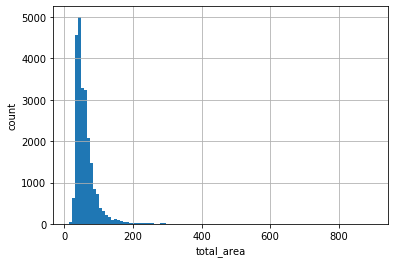

In [150]:
print(data['total_area'].describe())
data['total_area'].hist(bins=100)
plt.xlabel('total_area')
plt.ylabel('count')

<function matplotlib.pyplot.show(*args, **kw)>

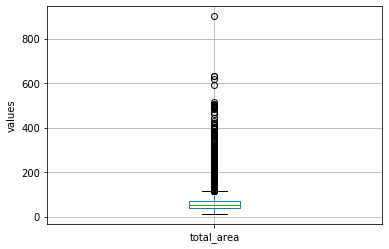

In [158]:
data.boxplot(column='total_area')
plt.ylabel('values')
plt.show

Как показано на диаграмме ящика с усами, площадь менее 30 и более 100 кв.м. - выбросы.
Создадим отдельную переменную, в которую положим обработанные значения, и после будем сравнивать с необработанной

count    21128.000000
mean        53.787104
std         17.126022
min         30.000000
25%         40.000000
50%         50.300000
75%         64.600000
max        100.000000
Name: total_area, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

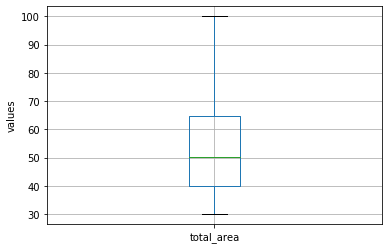

In [157]:
data_process = data.query('30.0 <= total_area <= 100.0')
print(data_process['total_area'].describe())
data_process.boxplot(column='total_area')
plt.ylabel('values')
plt.show

После обработки и удаления выбросов среднее значение общей площади с 60 кв.м. сократилось до 53 кв.м.

count    23650.000000
mean        34.432225
std         21.810096
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64


Text(0, 0.5, 'count')

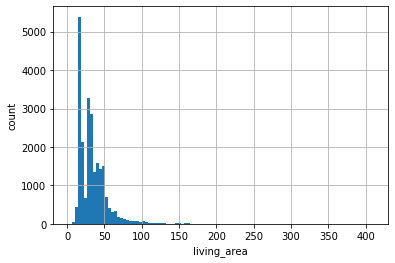

In [155]:
print(data['living_area'].describe())
data['living_area'].hist(bins=100)
plt.xlabel('living_area')
plt.ylabel('count')

<function matplotlib.pyplot.show(*args, **kw)>

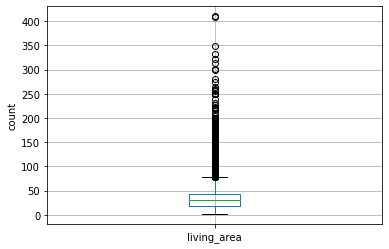

In [156]:
data.boxplot(column='living_area')
plt.ylabel('count')
plt.show

count    18898.000000
mean        32.422294
std         11.752874
min         17.000000
25%         20.700000
50%         31.000000
75%         41.000000
max         71.000000
Name: living_area, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

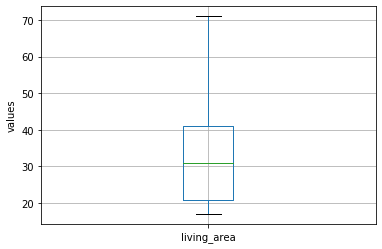

In [159]:
data_process = data_process.query('17.0 <= living_area <= 71.0')
print(data_process['living_area'].describe())
data_process.boxplot(column='living_area')
plt.ylabel('values')
plt.show

И аналогично поступаем с kitchen_area

count    23650.000000
mean        10.563918
std          5.639240
min          1.300000
25%          7.300000
50%          9.550118
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64


Text(0, 0.5, 'count')

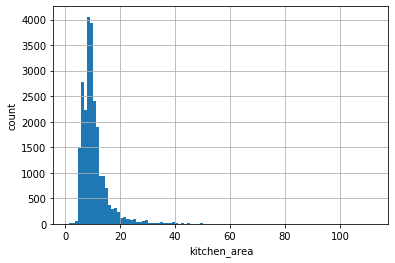

In [160]:
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=100)
plt.xlabel('kitchen_area')
plt.ylabel('count')

<function matplotlib.pyplot.show(*args, **kw)>

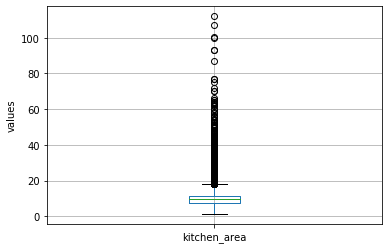

In [161]:
data.boxplot(column='kitchen_area')
plt.ylabel('values')
plt.show

count    18053.000000
mean         9.168574
std          2.626461
min          3.200000
25%          7.000000
50%          9.000000
75%         10.940000
max         16.500000
Name: kitchen_area, dtype: float64


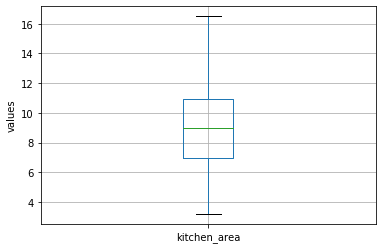

In [162]:
data_process = data_process.query('3.0 <= kitchen_area <= 16.5')
print(data_process['kitchen_area'].describe())
data_process.boxplot(column='kitchen_area')
plt.ylabel('values')
plt.show()

#### ***4.1.2. Исследование цены***

count    23650.000000
mean         6.052643
std         10.923801
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        763.000000
Name: price_billions, dtype: float64


Text(0, 0.5, 'count')

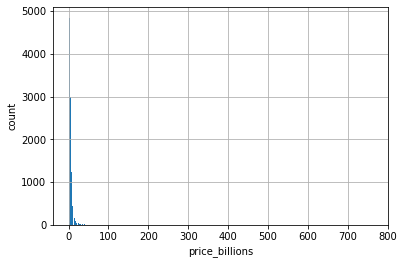

In [163]:
# для удобства добавим в таблицу столбец с ценой, переведенной в миллионы
data['price_billions'] = data['last_price'] // 1000000
print(data['price_billions'].describe())
data['price_billions'].hist(bins=1000)
plt.xlabel('price_billions')
plt.ylabel('count')

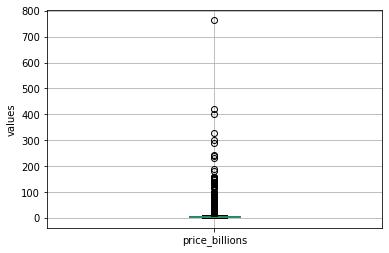

In [164]:
data.boxplot(column='price_billions')
plt.ylabel('values')
plt.show()

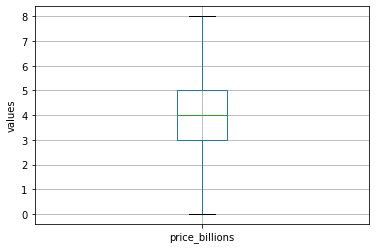

In [165]:
# цена более 8 миллионов - выбросы
data_process['price_billions'] = data_process['last_price'] // 1000000
data_process = data_process.query('price_billions <= 8')
data_process.boxplot(column='price_billions')
plt.ylabel('values')
plt.show()

#### ***4.1.3. Исследование числа комнат***

In [166]:
print(data['rooms'].describe())
print('Количество уникальных значений комнат (в будущем - количество корзин в гистограмме):', len(data['rooms'].unique()))

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
Количество уникальных значений комнат (в будущем - количество корзин в гистограмме): 17


Text(0, 0.5, 'count')

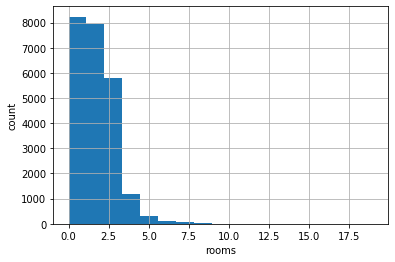

In [167]:
data['rooms'].hist(bins=17)
plt.xlabel('rooms')
plt.ylabel('count')

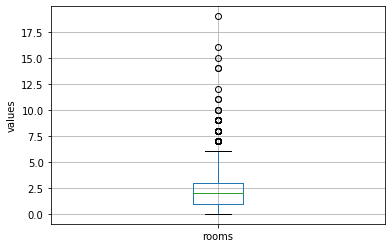

In [168]:
data.boxplot(column='rooms')
plt.ylabel('values')
plt.show()

In [169]:
# более 6 комнат - выбросы
# 0 комнат в жилье просто не бывает - избавимся от этих строк (в переменной data_process)
display(data_process)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,ratio_living_area,ratio_kitchen_area,price_billions
1,2018-12-04,81.0,7,3350000.0,1,40.4,18.6,11.000000,1,11,...,0,NaN,82920,1,12,2018,первый,0.460396,0.272277,3.0
2,2015-08-20,558.0,10,5196000.0,2,56.0,34.3,8.300000,4,5,...,2,574.0,92785,3,8,2015,другой,0.612500,0.148214,5.0
9,2017-02-26,289.0,18,5400000.0,3,61.0,43.6,6.500000,7,9,...,0,NaN,88524,6,2,2017,другой,0.714754,0.106557,5.0
10,2017-11-16,137.0,5,5050000.0,1,39.6,20.3,8.500000,3,12,...,2,553.0,127525,3,11,2017,другой,0.512626,0.214646,5.0
11,2018-08-27,7.0,9,3300000.0,2,44.0,31.0,6.000000,4,5,...,0,NaN,75000,0,8,2018,другой,0.704545,0.136364,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,2018-07-19,15.0,3,5500000.0,2,52.0,31.0,6.000000,2,5,...,0,NaN,105769,3,7,2018,другой,0.596154,0.115385,5.0
23692,2017-07-07,413.0,2,1350000.0,1,30.0,17.5,6.000000,4,5,...,0,NaN,45000,4,7,2017,другой,0.583333,0.200000,1.0
23693,2016-08-05,239.0,9,4600000.0,3,62.4,40.0,8.000000,8,9,...,1,675.0,73717,4,8,2016,другой,0.641026,0.128205,4.0
23695,2018-01-15,45.0,14,3100000.0,3,59.0,38.0,8.500000,4,5,...,0,NaN,52542,0,1,2018,другой,0.644068,0.144068,3.0


In [170]:
data_process['rooms'] = data['rooms']
display(data_process)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,ratio_living_area,ratio_kitchen_area,price_billions
1,2018-12-04,81.0,7,3350000.0,1,40.4,18.6,11.000000,1,11,...,0,NaN,82920,1,12,2018,первый,0.460396,0.272277,3.0
2,2015-08-20,558.0,10,5196000.0,2,56.0,34.3,8.300000,4,5,...,2,574.0,92785,3,8,2015,другой,0.612500,0.148214,5.0
9,2017-02-26,289.0,18,5400000.0,3,61.0,43.6,6.500000,7,9,...,0,NaN,88524,6,2,2017,другой,0.714754,0.106557,5.0
10,2017-11-16,137.0,5,5050000.0,1,39.6,20.3,8.500000,3,12,...,2,553.0,127525,3,11,2017,другой,0.512626,0.214646,5.0
11,2018-08-27,7.0,9,3300000.0,2,44.0,31.0,6.000000,4,5,...,0,NaN,75000,0,8,2018,другой,0.704545,0.136364,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,2018-07-19,15.0,3,5500000.0,2,52.0,31.0,6.000000,2,5,...,0,NaN,105769,3,7,2018,другой,0.596154,0.115385,5.0
23692,2017-07-07,413.0,2,1350000.0,1,30.0,17.5,6.000000,4,5,...,0,NaN,45000,4,7,2017,другой,0.583333,0.200000,1.0
23693,2016-08-05,239.0,9,4600000.0,3,62.4,40.0,8.000000,8,9,...,1,675.0,73717,4,8,2016,другой,0.641026,0.128205,4.0
23695,2018-01-15,45.0,14,3100000.0,3,59.0,38.0,8.500000,4,5,...,0,NaN,52542,0,1,2018,другой,0.644068,0.144068,3.0


count    16697.000000
mean         2.000299
std          0.828524
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


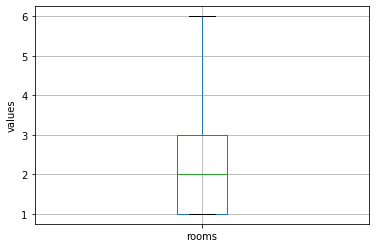

In [174]:
# удалим строки с кол-вом комнат 0
data_process = data_process[(data_process['rooms']>=1) & (data_process['rooms']<=6)]
print(data_process['rooms'].describe())
data_process.boxplot(column='rooms')
plt.ylabel('values')
plt.show()

#### ***4.1.4. Исследование высоты потолков***

count    23650.000000
mean         2.770789
std          0.987489
min          1.000000
25%          2.600000
50%          2.770000
75%          2.770000
max        100.000000
Name: ceiling_height, dtype: float64


Text(0, 0.5, 'count')

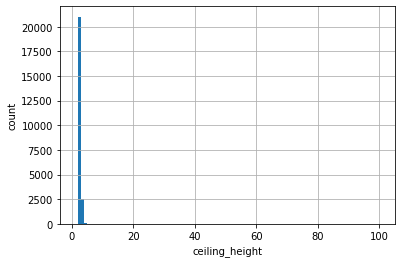

In [175]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100)
plt.xlabel('ceiling_height')
plt.ylabel('count')

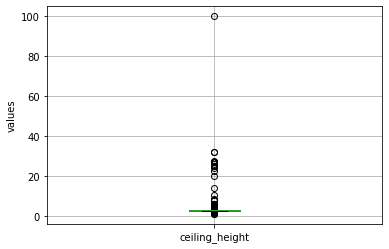

In [176]:
data.boxplot(column='ceiling_height')
plt.ylabel('values')
plt.show()

Text(0, 0.5, 'count')

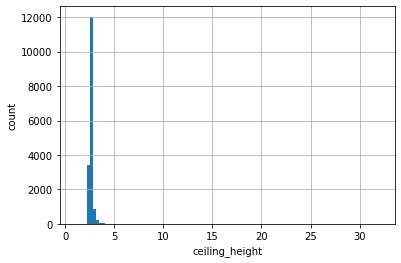

In [177]:
data_process['ceiling_height'].hist(bins=100)
plt.xlabel('ceiling_height')
plt.ylabel('count')

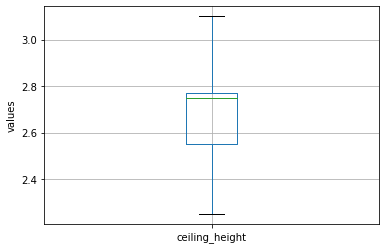

In [179]:
data_process = data_process[(data_process['ceiling_height']>=2.25) & (data_process['ceiling_height']<=3.1)]
data_process.boxplot(column='ceiling_height')
plt.ylabel('values')
plt.show()

#### ***4.1.5 Общее исследование***

In [180]:
# теперь по двум переменным data и data_process построим 
data_corr = data.loc[:, ['price_billions', 'total_area', 'rooms', 'ceiling_height']]
print(data_corr.corr())

                price_billions  total_area     rooms  ceiling_height
price_billions        1.000000    0.653897  0.363483        0.062493
total_area            0.653897    1.000000  0.758745        0.077511
rooms                 0.363483    0.758745  1.000000        0.043374
ceiling_height        0.062493    0.077511  0.043374        1.000000


Зависимость прослеживается в следующих парах:
- total_area - price_billions
- total_area - rooms
- rooms - price_billions
Остальные столбцы находятся в очень слабой зависимости
Построим для этих трех пар диаграмму рассеивания

In [181]:
# total_area - price_billions
# total_area - rooms
# rooms - price_billions
data_corr_new = data.loc[:, ['last_price', 'total_area', 'rooms']]
data_corr_new.corr()

,last_price,total_area,rooms
last_price,1.000000,0.653743,0.363421
total_area,0.653743,1.000000,0.758745
rooms,0.363421,0.758745,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b32158750>,
      dtype=object)

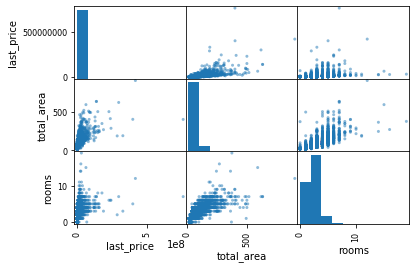

In [182]:
pd.plotting.scatter_matrix(data_corr_new)

Теперь сделаем то же самое для обработанной переменной data_process

In [183]:
data_process_corr = data_process.loc[:, ['last_price', 'total_area', 'rooms']]
data_process_corr.corr()

,last_price,total_area,rooms
last_price,1.000000,0.586230,0.333845
total_area,0.586230,1.000000,0.782646
rooms,0.333845,0.782646,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b31ebc110>,
      dtype=object)

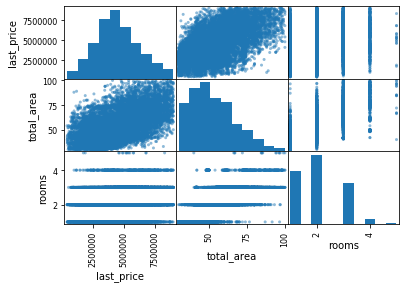

In [184]:
pd.plotting.scatter_matrix(data_process_corr)

**Вывод**

В необработанной переменной data очень много выбросов, нет структуры
В обработанной data_process все закономерно и четко:
- чем больше площадь, тем больше цена (причем прослеживается четкая градация)
- между ценой и количеством комнат зависимость слабая (0,32), даже меньше чем в data (0,36). Т.е. если увеличивается кол-во комнат - не значит, что и увеличивается стоимость. Здесь и однокомнатная квартира может стоить столько же сколько и 3-4-комнатная
- в total_area и rooms так же все логично, чем больше комнат - тем больше площадь

### **4.2 Исследование времени продажи квартиры**

In [185]:
print(data['days_exposition'].describe())

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


Среднее время продажи: 180 дней
Медиана: 95 дней 
Значения отличаются в два раза, поэтому можно попробовать избавиться от выбросов, таких как менее 30 дней и более 500 дней. Проверим с помощью гистограммы и ящика с усами 

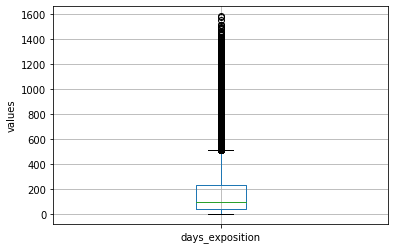

In [186]:
data.boxplot(column='days_exposition')
plt.ylabel('values')
plt.show()

Text(0, 0.5, 'count')

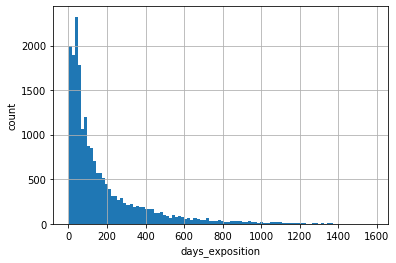

In [188]:
data['days_exposition'].hist(bins=100)
plt.xlabel('days_exposition')
plt.ylabel('count')

In [189]:
data_process = data_process.query('30 <= days_exposition <= 330')
display(data_process)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,ratio_living_area,ratio_kitchen_area,price_billions
1,2018-12-04,81.0,7,3350000.0,1,40.4,18.6,11.0,1,11,...,0,NaN,82920,1,12,2018,первый,0.460396,0.272277,3.0
9,2017-02-26,289.0,18,5400000.0,3,61.0,43.6,6.5,7,9,...,0,NaN,88524,6,2,2017,другой,0.714754,0.106557,5.0
10,2017-11-16,137.0,5,5050000.0,1,39.6,20.3,8.5,3,12,...,2,553.0,127525,3,11,2017,другой,0.512626,0.214646,5.0
12,2016-06-30,90.0,10,3890000.0,2,54.0,30.0,9.0,5,5,...,0,NaN,72037,3,6,2016,последний,0.555556,0.166667,3.0
14,2016-06-23,203.0,1,4400000.0,1,36.0,17.0,8.0,1,6,...,1,96.0,122222,3,6,2016,первый,0.472222,0.222222,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,2016-06-23,40.0,11,2350000.0,1,35.6,17.0,8.3,4,5,...,0,NaN,66011,3,6,2016,другой,0.477528,0.233146,2.0
23686,2017-04-29,193.0,8,3300000.0,1,31.0,18.0,6.5,6,9,...,1,317.0,106451,5,4,2017,другой,0.580645,0.209677,3.0
23687,2017-12-16,38.0,6,3200000.0,1,39.0,20.0,11.0,6,9,...,0,NaN,82051,5,12,2017,другой,0.512821,0.282051,3.0
23693,2016-08-05,239.0,9,4600000.0,3,62.4,40.0,8.0,8,9,...,1,675.0,73717,4,8,2016,другой,0.641026,0.128205,4.0


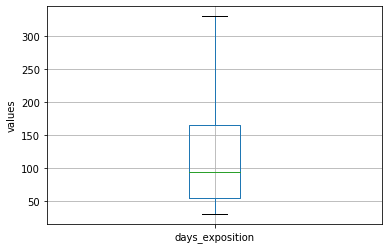

In [190]:
data_process.boxplot(column='days_exposition')
plt.ylabel('values')
plt.show()

Получается, основное время продажи - от 1 месяца до 11 месяцев 
Таким образом, 
- если квартира была продана менее, чем за 1 месяц - это необычно быстро,
- если она продавалась более 11 месяцев, более года - это довольно долго.


### **4.3. Данные без редких и выбивающихся значений**

Переменная data_process - это переменная, созданная в течение всей работы, из которой сразу были удалены слишком большие и слишком маленькие значения, выбросы. В ней около 9600 строк, а в изначальных данных было 23700 строк, т.е. количество сократилось в 2,5 раза (очень много)

In [191]:
data_process.loc[:, ['days_exposition', 'price_billions', 'rooms', 'total_area', 'living_area', 'kitchen_area', 'price_sqm']].describe()

,days_exposition,price_billions,rooms,total_area,living_area,kitchen_area,price_sqm
count,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000
mean,117.779537,3.979058,1.971348,52.294305,30.757814,8.986014,86581.222234
std,77.478129,1.737990,0.813372,14.382972,10.812055,2.483629,27191.574282
min,30.000000,0.000000,1.000000,30.000000,17.000000,3.200000,7962.000000
25%,55.000000,3.000000,1.000000,41.700000,20.000000,7.000000,70512.000000
50%,93.000000,4.000000,2.000000,50.000000,30.000000,9.000000,88000.000000
75%,165.000000,5.000000,3.000000,61.300000,38.100000,10.500000,103078.250000
max,330.000000,8.000000,5.000000,100.000000,70.000000,16.500000,234920.000000


In [192]:
display(data_process)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,ratio_living_area,ratio_kitchen_area,price_billions
1,2018-12-04,81.0,7,3350000.0,1,40.4,18.6,11.0,1,11,...,0,NaN,82920,1,12,2018,первый,0.460396,0.272277,3.0
9,2017-02-26,289.0,18,5400000.0,3,61.0,43.6,6.5,7,9,...,0,NaN,88524,6,2,2017,другой,0.714754,0.106557,5.0
10,2017-11-16,137.0,5,5050000.0,1,39.6,20.3,8.5,3,12,...,2,553.0,127525,3,11,2017,другой,0.512626,0.214646,5.0
12,2016-06-30,90.0,10,3890000.0,2,54.0,30.0,9.0,5,5,...,0,NaN,72037,3,6,2016,последний,0.555556,0.166667,3.0
14,2016-06-23,203.0,1,4400000.0,1,36.0,17.0,8.0,1,6,...,1,96.0,122222,3,6,2016,первый,0.472222,0.222222,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23682,2016-06-23,40.0,11,2350000.0,1,35.6,17.0,8.3,4,5,...,0,NaN,66011,3,6,2016,другой,0.477528,0.233146,2.0
23686,2017-04-29,193.0,8,3300000.0,1,31.0,18.0,6.5,6,9,...,1,317.0,106451,5,4,2017,другой,0.580645,0.209677,3.0
23687,2017-12-16,38.0,6,3200000.0,1,39.0,20.0,11.0,6,9,...,0,NaN,82051,5,12,2017,другой,0.512821,0.282051,3.0
23693,2016-08-05,239.0,9,4600000.0,3,62.4,40.0,8.0,8,9,...,1,675.0,73717,4,8,2016,другой,0.641026,0.128205,4.0


Основные особенности: 
- количество комнат находится в границах от 1 до 5 (среднее значение 1,97 ~ 2, медиана 2 - практически одинаковые)
- общая площадь находится в границах от 30 до 100 кв.м. (среднее значение 52, медиана 50 - не сильно разнятся)
- жилая площадь находится в границах от 10 до 70 кв.м. (среднее значение 30, медиана 30 - одинаковые)
- площадь кухни находится в границах от 2 до 16.5 кв.м. (среднее значение 8.98 ~ 9, медиана 9 - практически одинаковые)
- время продажи находится в границах от 30 до 330 дней (среднее значение 118, медиана 93 - здесь отличие также в два раза, как и в необработанных данных)
- цена в миллионах рублей находится в границах от 1 млн до 8 млн (среднее значение 3,97 ~ 4, медиана 4 - практически одинаковые)
- цена за квадратный метр в рублях находится в границах от 8 тысяч до 235 тысяч (среднее значение 86600, медиана 88000 - практически одинаковые)
Таким образом, обработанная переменная выдает правдоподобные значения: среднее значение и медиана совпадают практически везде, кроме количества дней продажи (но здесь действительно достаточно много разных значений - квартиру можно продавать и месяц, и несколько лет)

### **4.4. Факторы, влияющие на стоимость квартиры**

#### ***4.4.1. Зависимость стоимости квартиры от цены за квадратный метр***

In [193]:
data_process['last_price'].corr(data_process['price_sqm'])

0.6913125022978635

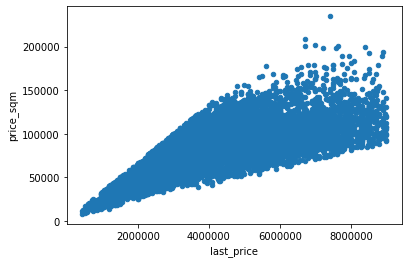

In [194]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='price_sqm', kind='scatter')

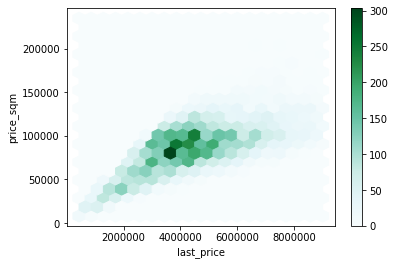

In [195]:
# основная масса ясна, но построим ячеистую диаграмму
data_process.plot(x='last_price', y='price_sqm', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Стоимость квартиры зависит от цены за квадратный метр. Оптимальное значение: 80-90 тысяч рублей за квадратный метр при стоимости квартиры в 3,5 млн рублей.
Также коэфицциент корреляции, равный почти 0,7 говорит о сильной зависимости

#### ***4.4.2. Зависимость стоимости квартиры от площади квартиры***

In [196]:
data_process['last_price'].corr(data_process['total_area'])

0.5962236886633568

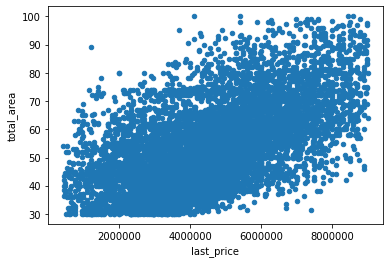

In [197]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='total_area', kind='scatter')

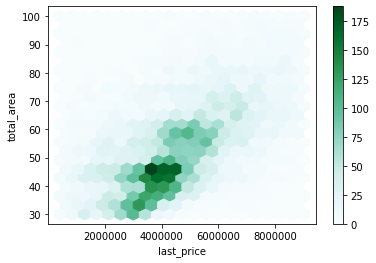

In [198]:
# основная масса ясна, но построим ячеистую диаграмму
data_process.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Стоимость квартиры зависит от общей площади, но зависимость уже слабее, чем от цены за квадратный метр. Оптимальное значение: 45 кв.м  при стоимости квартиры в 3,5 млн рублей.
Также коэфицциент корреляции, равный почти 0,6 говорит о сильной зависимости

#### ***4.4.3. Зависимость стоимости квартиры от количества комнат***

In [199]:
data_process['last_price'].corr(data_process['rooms'])

0.3360227221377123

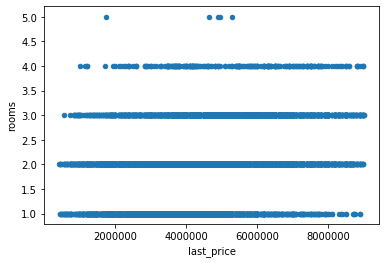

In [200]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='rooms', kind='scatter')

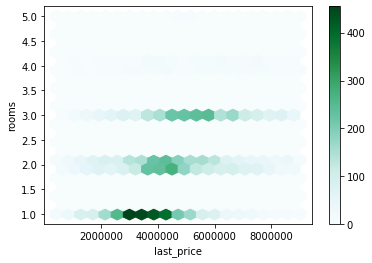

In [201]:
# основная масса ясна, но построим ячеистую диаграмму
data_process.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Зависимоть прослеживается, но уже очень слабая. Да, действительно, чем больше комнат, тем дороже квартира, но такое происходит незначительно! 
В основном это:
- 1-комнатная квартира по цене в 3 млн
- 2-комнатная квартира по цене в 3,5-4 млн
- 3-комнатная квартира по цене в 4,5-5 млн

#### ***4.4.4. Зависимость стоимости квартиры от удалённости от центра***

In [202]:
data_process['last_price'].corr(data_process['cityCenters_nearest'])

-0.31013664840716765

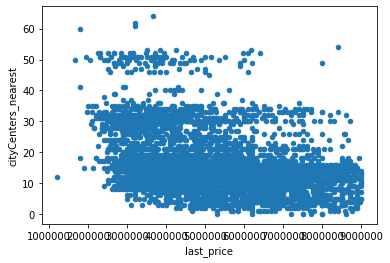

In [203]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='cityCenters_nearest', kind='scatter')

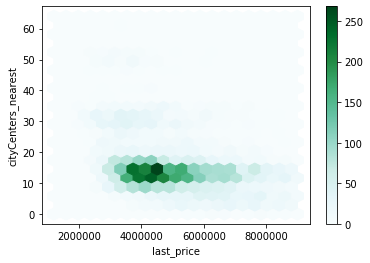

In [204]:
# основная масса ясна, но построим ячеистую диаграмму
data_process.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

По отрицательному коэффициенту корреляции можно сказать, что чем меньше расстояние от центра до продаваемой квартиры, тем она дороже, а чем дальше - чем дешевле, пока все логично! Хоть и коэффициент -0,31 - не сильно высок, тем не менее зависимость есть.

#### ***4.4.5. Зависимость стоимости квартиры от этажности***

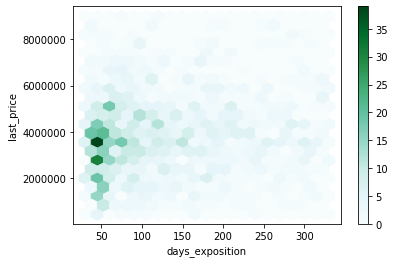

In [205]:
data_process_first_floor = data_process[data_process['floor_type']=='первый']
data_process_first_floor.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

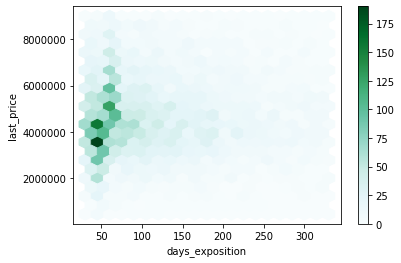

In [206]:
data_process_another_floor = data_process[data_process['floor_type']=='другой']
data_process_another_floor.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

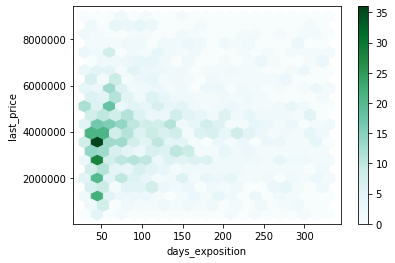

In [207]:
data_process_last_floor = data_process[data_process['floor_type']=='последний']
data_process_last_floor.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

In [208]:
data_process_floors_pivot = data_process.pivot_table(index='rooms', columns='floor_type', values='price_billions', aggfunc='mean')
display(data_process_floors_pivot)

floor_type,другой,первый,последний
rooms,,,
1,3.395965,2.518987,2.740000
2,4.387597,3.138699,3.413078
3,4.967990,4.142012,4.390671
4,5.025157,4.438596,4.900000
5,5.000000,3.250000,NaN


In [209]:
data_process_floors_pivot['ratio_first_another'] = 1 - (data_process_floors_pivot['первый'] / data_process_floors_pivot['другой'])
data_process_floors_pivot['ratio_last_another'] = 1 - (data_process_floors_pivot['последний'] / data_process_floors_pivot['другой'])
display(data_process_floors_pivot)

floor_type,другой,первый,последний,ratio_first_another,ratio_last_another
rooms,,,,,
1,3.395965,2.518987,2.740000,0.258241,0.193160
2,4.387597,3.138699,3.413078,0.284643,0.222108
3,4.967990,4.142012,4.390671,0.166260,0.116208
4,5.025157,4.438596,4.900000,0.116725,0.024906
5,5.000000,3.250000,NaN,0.350000,NaN


**Вывод**

Ориентировочно, стоимость квартиры не зависит от этажа *(но что-то мне подсказывает, что это не правильно, никак не могу догадаться как их сгруппировать и в какой график оформить - все перепробовала)*
По сводной таблице можно сказать, что в среднем квартиры на первых и последних этажах стоят дешевле на 11-30%, чем на других.

#### ***4.4.6. Зависимость стоимости квартиры от дня недели, месяца и года публицации объявления***

In [210]:
# weekday_exposition	month_exposition	year_exposition
data_process['last_price'].corr(data_process['weekday_exposition'])

-0.011665647495257902

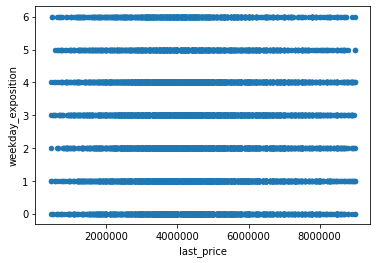

In [211]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='weekday_exposition', kind='scatter')

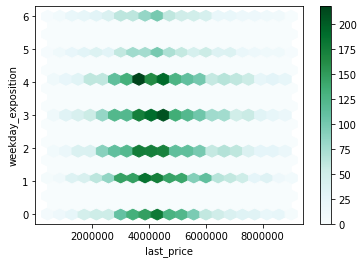

In [212]:
# никакой зависимости нет, но проверим ячеистой диаграммой
data_process.plot(x='last_price', y='weekday_exposition', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Стоимость квартиры  не зависит от дня недели, в который было выложено объявление. Видна только примерная средня цена от 3 до 5 млн рублей. Также можно сказать, что в выходные дни реже выкладывали объявление, в будние дни это происходит активнее.

In [213]:
# month_exposition	year_exposition
data_process['last_price'].corr(data_process['month_exposition'])

0.0239302782680891

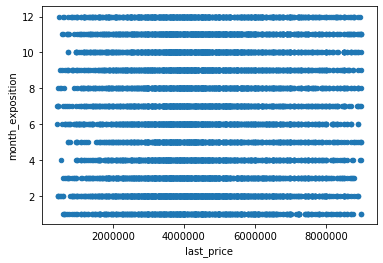

In [214]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='month_exposition', kind='scatter')

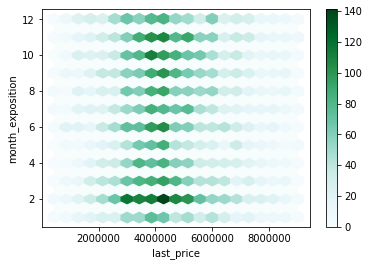

In [215]:
# зависимость очень слабая, но проверим ячеистой диаграммой
data_process.plot(x='last_price', y='month_exposition', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

На ячеистой диаграмме видно, что в январе и декабре слабее всего продаются квартиры, это и логично, т.к. май, декабрь и январь - месяцы, в которые большиство людей занято подготовкой к Новому году, праздникам и каникулами. А ферваль - наиболее активный месяц выкладывания объявлений.

In [216]:
# year_exposition
data_process['last_price'].corr(data_process['year_exposition'])

0.007730960778668754

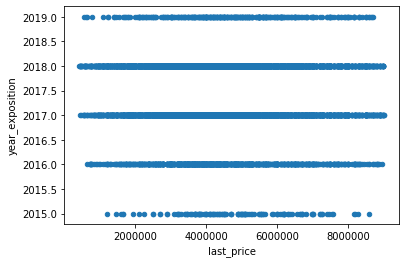

In [217]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='year_exposition', kind='scatter')

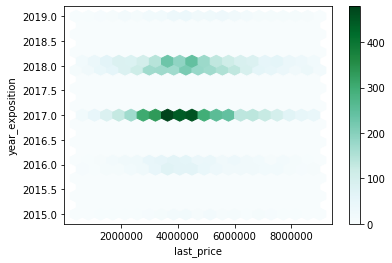

In [218]:
# зависимость прослеживается, особенно в 2016-2018 году, но проверим ячеистой диаграммой
data_process.plot(x='last_price', y='year_exposition', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

На ячеистой диаграмме видно, что 2017 год - самый активный год в продаже квартиры. Следующий 2018, и чуть слабее в 2016. 2015 и 2019 года - менее активные на подачу объявлений. 

### **4.5.  10 населенных пунктов с наибольшим числом объявлений**

In [219]:
# создадим новый датафрейм, где будут перечислены все уникальные названия населенных пунктов и кол-во объявлений из данного пункта
data_locality_name = data_process.pivot_table(index='locality_name', values='floor_type', aggfunc='count')
display(data_locality_name)

,floor_type
locality_name,
Бокситогорск,10
Волосово,18
Волхов,62
Всеволожск,191
Выборг,131
...,...
село Паша,2
село Путилово,1
село Рождествено,1


In [220]:
# отсортируем таблицу в порядке убывания
data_locality_name = data_locality_name.sort_values(by='floor_type',ascending=False)
display(data_locality_name.head(10))

,floor_type
locality_name,
Санкт-Петербург,5887
посёлок Шушары,223
Всеволожск,191
посёлок Мурино,180
Колпино,174
Гатчина,165
Пушкин,160
Выборг,131
посёлок Парголово,129


In [221]:
# выберем первые 10 населенных пунктов:
data_locality_name10 = data_locality_name[data_locality_name['floor_type']>=110]
display(data_locality_name10)

,floor_type
locality_name,
Санкт-Петербург,5887
посёлок Шушары,223
Всеволожск,191
посёлок Мурино,180
Колпино,174
Гатчина,165
Пушкин,160
Выборг,131
посёлок Парголово,129


In [222]:
# поменяем название столбцов в data_locality_name10
data_locality_name10.columns = ['count']
display(data_locality_name10)

,count
locality_name,
Санкт-Петербург,5887
посёлок Шушары,223
Всеволожск,191
посёлок Мурино,180
Колпино,174
Гатчина,165
Пушкин,160
Выборг,131
посёлок Парголово,129


In [223]:
# не знаю как избавиться от мультимндексов и создать столбец с индексами, поэтому делаю новый дата фрейм
locality_name10 = {
    'locality_name': [
        'Санкт-Петербург',
        'посёлок Шушары',
        'Всеволожск',
        'посёлок Мурино',
        'Колпино',
        'Гатчина',
        'Пушкин',
        'Выборг',
        'посёлок Парголово',
        'деревня Кудрово'
    ],
    
    'count': [
        5888,
        223,
        191,
        180,
        174,
        165,
        160,
        131,
        129,
        110
    ]
}

data_locality_name10_new = pd.DataFrame(locality_name10)
display(data_locality_name10_new)

,locality_name,count
0,Санкт-Петербург,5888
1,посёлок Шушары,223
2,Всеволожск,191
3,посёлок Мурино,180
4,Колпино,174
5,Гатчина,165
6,Пушкин,160
7,Выборг,131
8,посёлок Парголово,129
9,деревня Кудрово,110


In [224]:
avg_price_sqm_grouped = data_process.groupby('locality_name')['price_sqm'].mean()

def funcion(row):
    return avg_price_sqm_grouped.loc[row['locality_name']]
 
data_locality_name10_new.loc[:,'price_sqm'] = data_locality_name10_new.apply(funcion, axis=1)
display(data_locality_name10_new)

,locality_name,count,price_sqm
0,Санкт-Петербург,5888,100464.646339
1,посёлок Шушары,223,74806.313901
2,Всеволожск,191,65735.282723
3,посёлок Мурино,180,81829.200000
4,Колпино,174,72898.258621
5,Гатчина,165,67729.709091
6,Пушкин,160,96870.456250
7,Выборг,131,55764.297710
8,посёлок Парголово,129,84027.379845
9,деревня Кудрово,110,90504.154545


In [225]:
data_locality_name10_new = data_locality_name10_new.sort_values('price_sqm', ascending=False)
display(data_locality_name10_new)

,locality_name,count,price_sqm
0,Санкт-Петербург,5888,100464.646339
6,Пушкин,160,96870.456250
9,деревня Кудрово,110,90504.154545
8,посёлок Парголово,129,84027.379845
3,посёлок Мурино,180,81829.200000
1,посёлок Шушары,223,74806.313901
4,Колпино,174,72898.258621
5,Гатчина,165,67729.709091
2,Всеволожск,191,65735.282723
7,Выборг,131,55764.297710


In [226]:
print('Населенный пункт с самой высокой стоимостью жилья: Санкт-Петербург')
print('Населенный пункт с самой низкой стоимостью жилья: Выборг')

Населенный пункт с самой высокой стоимостью жилья: Санкт-Петербург
Населенный пункт с самой низкой стоимостью жилья: Выборг


### **4.6.  Определение области, входящей в центр**

In [227]:
data_process_Spb = data_process[data_process['locality_name']=='Санкт-Петербург']
display(data_process_Spb)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,ratio_living_area,ratio_kitchen_area,price_billions
9,2017-02-26,289.0,18,5400000.0,3,61.0,43.6,6.5,7,9,...,0,NaN,88524,6,2,2017,другой,0.714754,0.106557,5.0
10,2017-11-16,137.0,5,5050000.0,1,39.6,20.3,8.5,3,12,...,2,553.0,127525,3,11,2017,другой,0.512626,0.214646,5.0
18,2017-01-27,168.0,8,3250000.0,1,31.0,19.4,5.6,2,5,...,0,NaN,104838,4,1,2017,другой,0.625806,0.180645,3.0
25,2015-10-01,300.0,3,6800000.0,2,76.0,39.0,15.0,18,23,...,1,564.0,89473,3,10,2015,другой,0.513158,0.197368,6.0
26,2017-04-28,265.0,6,4050000.0,4,60.0,43.0,7.0,4,5,...,1,95.0,67500,4,4,2017,другой,0.716667,0.116667,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,2016-05-20,131.0,11,4250000.0,1,47.0,18.2,14.6,1,6,...,1,519.0,90425,4,5,2016,первый,0.387234,0.310638,4.0
23668,2018-03-16,157.0,13,6000000.0,2,47.0,27.0,9.0,4,5,...,0,NaN,127659,4,3,2018,другой,0.574468,0.191489,6.0
23681,2018-05-11,80.0,13,5250000.0,2,43.0,29.0,6.0,2,5,...,2,660.0,122093,4,5,2018,другой,0.674419,0.139535,5.0
23686,2017-04-29,193.0,8,3300000.0,1,31.0,18.0,6.5,6,9,...,1,317.0,106451,5,4,2017,другой,0.580645,0.209677,3.0


In [228]:
# тк еще в предобработке данных столбец с расстоянием до центра был переведен в километры, оставим его и будем исследовать по нему
print(data_process_Spb['cityCenters_nearest'].unique())

[15. 13. 10. 14. 11. 12. 16.  9.  6.  8. 17.  2.  4.  7. 25.  3. 21.  5.
 18. 20.  1. 24. 22. 19.  0. 23. nan 28. 26.]


In [229]:
data_Spb_avg_price_km = data_process_Spb.groupby('cityCenters_nearest')['last_price'].mean()
display(data_Spb_avg_price_km)

cityCenters_nearest
0.0     7.333222e+06
1.0     6.839950e+06
2.0     6.568756e+06
3.0     6.419221e+06
4.0     6.490790e+06
5.0     6.461065e+06
6.0     5.901441e+06
7.0     5.976963e+06
8.0     5.373381e+06
9.0     5.071811e+06
10.0    4.920233e+06
11.0    5.148097e+06
12.0    5.101465e+06
13.0    5.271591e+06
14.0    5.057612e+06
15.0    4.989680e+06
16.0    4.829069e+06
17.0    4.608203e+06
18.0    4.578945e+06
19.0    4.576639e+06
20.0    5.575845e+06
21.0    5.034111e+06
22.0    5.299104e+06
23.0    4.123077e+06
24.0    4.367197e+06
25.0    4.566362e+06
26.0    4.150000e+06
28.0    4.599250e+06
Name: last_price, dtype: float64

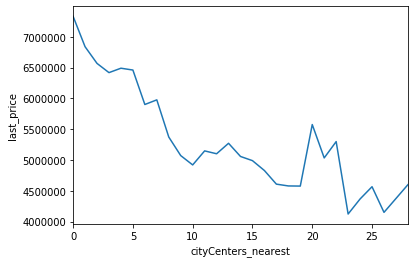

In [231]:
data_Spb_avg_price_km.plot()
plt.ylabel('last_price')
plt.show()

По графику видим, что резкий скачок просходит в 20 км, следовательно расстояние до центра меньшее или равное 20 км - область, входящая в центр.

### **4.7.  Сегмен квартир в центре**

In [232]:
data_process_Spb_centr = data_process_Spb[data_process_Spb['cityCenters_nearest']<=20.0]
display(data_process_Spb_centr)

,first_day_exposition,days_exposition,total_images,last_price,rooms,total_area,living_area,kitchen_area,floor,floors_total,...,ponds_around3000,ponds_nearest,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,ratio_living_area,ratio_kitchen_area,price_billions
9,2017-02-26,289.0,18,5400000.0,3,61.0,43.6,6.5,7,9,...,0,NaN,88524,6,2,2017,другой,0.714754,0.106557,5.0
10,2017-11-16,137.0,5,5050000.0,1,39.6,20.3,8.5,3,12,...,2,553.0,127525,3,11,2017,другой,0.512626,0.214646,5.0
18,2017-01-27,168.0,8,3250000.0,1,31.0,19.4,5.6,2,5,...,0,NaN,104838,4,1,2017,другой,0.625806,0.180645,3.0
25,2015-10-01,300.0,3,6800000.0,2,76.0,39.0,15.0,18,23,...,1,564.0,89473,3,10,2015,другой,0.513158,0.197368,6.0
26,2017-04-28,265.0,6,4050000.0,4,60.0,43.0,7.0,4,5,...,1,95.0,67500,4,4,2017,другой,0.716667,0.116667,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,2016-05-20,131.0,11,4250000.0,1,47.0,18.2,14.6,1,6,...,1,519.0,90425,4,5,2016,первый,0.387234,0.310638,4.0
23668,2018-03-16,157.0,13,6000000.0,2,47.0,27.0,9.0,4,5,...,0,NaN,127659,4,3,2018,другой,0.574468,0.191489,6.0
23681,2018-05-11,80.0,13,5250000.0,2,43.0,29.0,6.0,2,5,...,2,660.0,122093,4,5,2018,другой,0.674419,0.139535,5.0
23686,2017-04-29,193.0,8,3300000.0,1,31.0,18.0,6.5,6,9,...,1,317.0,106451,5,4,2017,другой,0.580645,0.209677,3.0


#### ***4.7.1. Зависимость стоимости квартиры в центре от цены за квадратный метр***

In [233]:
print('Коэффициент корреляции по всему городу:',data_process_Spb['last_price'].corr(data_process_Spb['price_sqm']))
print('Коэффициент корреляции по центру:',data_process_Spb_centr['last_price'].corr(data_process_Spb_centr['price_sqm']))

Коэффициент корреляции по всему городу: 0.40861357062536335
Коэффициент корреляции по центру: 0.41231475790177713


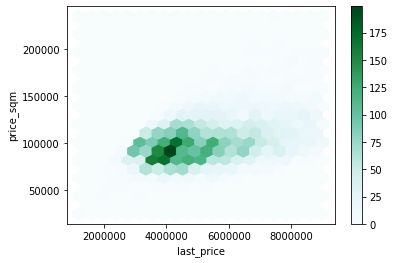

In [234]:
data_process_Spb.plot(x='last_price', y='price_sqm', kind='hexbin', gridsize=20, sharex=False)

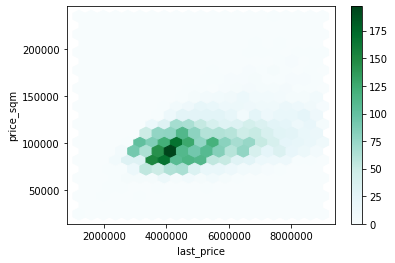

In [235]:
data_process_Spb_centr.plot(x='last_price', y='price_sqm', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Зависимость стоимости квартиры от цены за квадратный метр в городе едва ли отличается от тех же параметров в центре

#### ***4.7.2. Зависимость стоимости квартиры в центре от площади квартиры***

In [236]:
print('Коэффициент корреляции по всему городу:',data_process_Spb['last_price'].corr(data_process_Spb['total_area']))
print('Коэффициент корреляции по центру:',data_process_Spb_centr['last_price'].corr(data_process_Spb_centr['total_area']))

Коэффициент корреляции по всему городу: 0.745006657557115
Коэффициент корреляции по центру: 0.7488908277862761


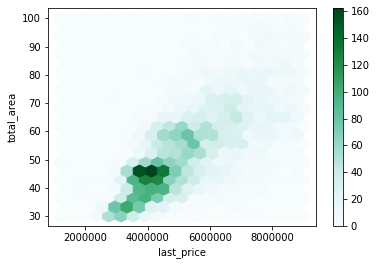

In [237]:
data_process_Spb.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, sharex=False)

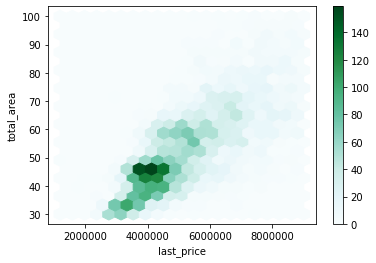

In [238]:
data_process_Spb_centr.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Здесь также зависимости практически не отличаются

#### ***4.7.3. Зависимость стоимости квартиры в центре от количества комнат***

In [239]:
print('Коэффициент корреляции по всему городу:',data_process_Spb['last_price'].corr(data_process_Spb['rooms']))
print('Коэффициент корреляции по центру:',data_process_Spb_centr['last_price'].corr(data_process_Spb_centr['rooms']))

Коэффициент корреляции по всему городу: 0.42649318079025605
Коэффициент корреляции по центру: 0.4188726853773339


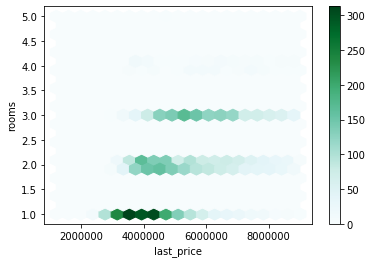

In [240]:
data_process_Spb.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, sharex=False)

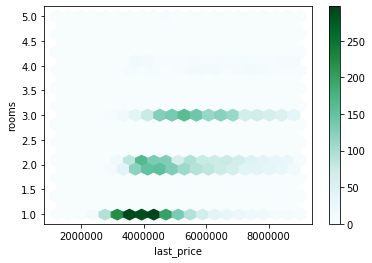

In [241]:
data_process_Spb_centr.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Также нет отличий

#### ***4.7.4. Зависимость стоимости квартиры в центре от удалённости от центра***

In [242]:
print('Коэффициент корреляции по всему городу:',data_process_Spb['last_price'].corr(data_process_Spb['cityCenters_nearest']))
print('Коэффициент корреляции по центру:',data_process_Spb_centr['last_price'].corr(data_process_Spb_centr['cityCenters_nearest']))

Коэффициент корреляции по всему городу: -0.2510334723690992
Коэффициент корреляции по центру: -0.268340909004703


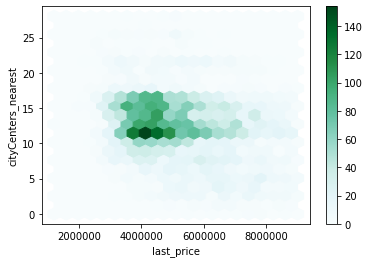

In [243]:
data_process_Spb.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=20, sharex=False)

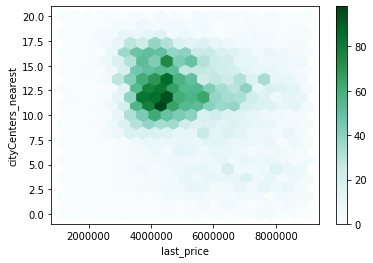

In [244]:
data_process_Spb_centr.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Здесь также нет отличий. Несмотря на то, что ячеистые диаграммы отличаются, значения остаются прежние: чаще всего продаются квартиры в радиусе 12-17 км от центра.

#### ***4.7.5. Зависимость стоимости квартиры от этажности***

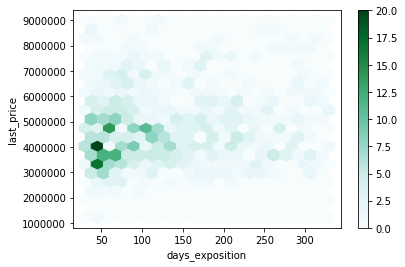

In [245]:
data_process_first_floor_Spb = data_process_Spb[data_process_Spb['floor_type']=='первый']
data_process_first_floor_Spb.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

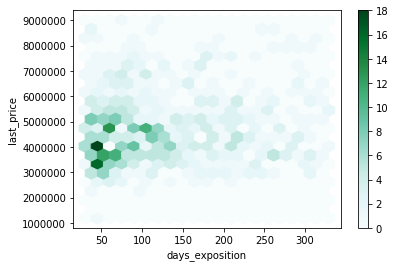

In [246]:
data_process_first_floor_Spb_centr = data_process_Spb_centr[data_process_Spb_centr['floor_type']=='первый']
data_process_first_floor_Spb_centr.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

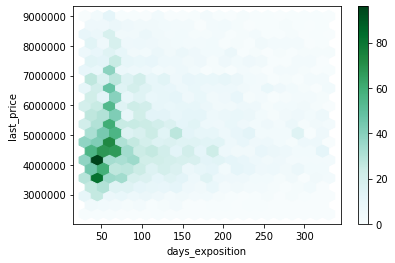

In [247]:
data_process_another_floor_Spb = data_process_Spb[data_process_Spb['floor_type']=='другой']
data_process_another_floor_Spb.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

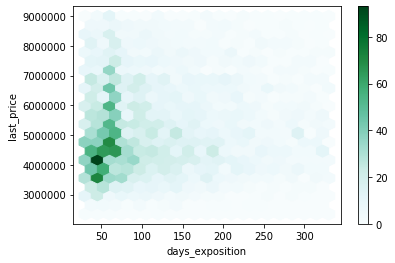

In [248]:
data_process_another_floor_Spb_centr = data_process_Spb_centr[data_process_Spb_centr['floor_type']=='другой']
data_process_another_floor_Spb_centr.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

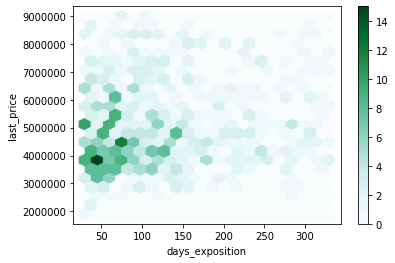

In [249]:
data_process_last_floor_Spb = data_process_Spb[data_process_Spb['floor_type']=='последний']
data_process_last_floor_Spb.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

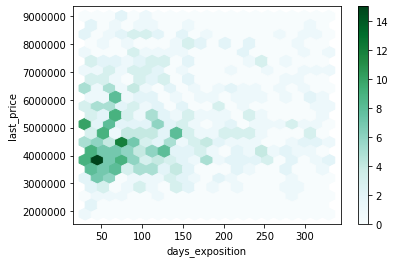

In [250]:
data_process_last_floor_Spb_centr = data_process_Spb_centr[data_process_Spb_centr['floor_type']=='последний']
data_process_last_floor_Spb_centr.plot(x='days_exposition', y='last_price', kind='hexbin', gridsize=20, sharex=False)

In [251]:
data_process_Spb_floors_pivot = data_process_Spb.pivot_table(index='rooms', columns='floor_type', values='price_billions', aggfunc='mean')
display(data_process_Spb_floors_pivot)

floor_type,другой,первый,последний
rooms,,,
1,3.900754,3.244898,3.621302
2,5.062876,4.132616,4.471572
3,5.553589,4.979275,5.424731
4,5.637168,5.076923,5.809524
5,NaN,4.000000,NaN


In [252]:
data_process_Spb_centr_floors_pivot = data_process_Spb_centr.pivot_table(index='rooms', columns='floor_type', values='price_billions', aggfunc='mean')
display(data_process_Spb_centr_floors_pivot)

floor_type,другой,первый,последний
rooms,,,
1,3.919376,3.264286,3.625767
2,5.075397,4.146520,4.468966
3,5.555783,4.983784,5.397727
4,5.598131,5.081081,5.809524
5,NaN,4.000000,NaN


In [253]:
data_process_Spb_floors_pivot['ratio_first_another'] = 1 - (data_process_Spb_floors_pivot['первый'] / data_process_Spb_floors_pivot['другой'])
data_process_Spb_floors_pivot['ratio_last_another'] = 1 - (data_process_Spb_floors_pivot['последний'] / data_process_Spb_floors_pivot['другой'])
display(data_process_Spb_floors_pivot)

floor_type,другой,первый,последний,ratio_first_another,ratio_last_another
rooms,,,,,
1,3.900754,3.244898,3.621302,0.168136,0.071641
2,5.062876,4.132616,4.471572,0.183741,0.116792
3,5.553589,4.979275,5.424731,0.103413,0.023203
4,5.637168,5.076923,5.809524,0.099384,-0.030575
5,NaN,4.000000,NaN,NaN,NaN


In [254]:
data_process_Spb_centr_floors_pivot['ratio_first_another'] = 1 - (data_process_Spb_centr_floors_pivot['первый'] / data_process_Spb_centr_floors_pivot['другой'])
data_process_Spb_centr_floors_pivot['ratio_last_another'] = 1 - (data_process_Spb_centr_floors_pivot['последний'] / data_process_Spb_centr_floors_pivot['другой'])
display(data_process_Spb_centr_floors_pivot)

floor_type,другой,первый,последний,ratio_first_another,ratio_last_another
rooms,,,,,
1,3.919376,3.264286,3.625767,0.167141,0.074912
2,5.075397,4.146520,4.468966,0.183016,0.119485
3,5.555783,4.983784,5.397727,0.102956,0.028449
4,5.598131,5.081081,5.809524,0.092361,-0.037761
5,NaN,4.000000,NaN,NaN,NaN


**Вывод**

Здесь также значения остались практически не изменными, но абсолютно все значения в центре чуть-чуть выше значений в общем в городе

#### ***4.4.6. Зависимость стоимости квартиры от дня недели, месяца и года публицации объявления***

In [255]:
# weekday_exposition
print('Коэффициент корреляции по всему городу:',data_process_Spb['last_price'].corr(data_process_Spb['weekday_exposition']))
print('Коэффициент корреляции по центру:',data_process_Spb_centr['last_price'].corr(data_process_Spb_centr['weekday_exposition']))

Коэффициент корреляции по всему городу: 0.003086492841068433
Коэффициент корреляции по центру: 0.002932844816310288


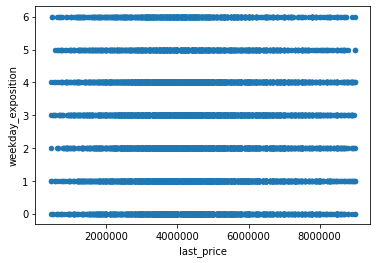

In [256]:
# для новой переменной составим диаграмму рассеивания 
data_process.plot(x='last_price', y='weekday_exposition', kind='scatter')

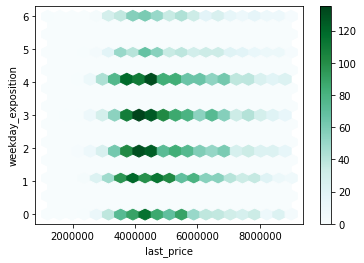

In [257]:
# никакой зависимости нет, но проверим ячеистой диаграммой
data_process_Spb.plot(x='last_price', y='weekday_exposition', kind='hexbin', gridsize=20, sharex=False)

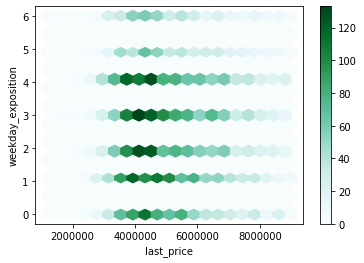

In [258]:
# никакой зависимости нет, но проверим ячеистой диаграммой
data_process_Spb_centr.plot(x='last_price', y='weekday_exposition', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Стоимость квартиры  не зависит от дня недели, в который было выложено объявление. Видна только примерная средня цена от 3 до 5 млн рублей

In [259]:
# month_exposition	year_exposition
print('Коэффициент корреляции по всему городу:',data_process_Spb['last_price'].corr(data_process_Spb['month_exposition']))
print('Коэффициент корреляции по центру:',data_process_Spb_centr['last_price'].corr(data_process_Spb_centr['month_exposition']))

Коэффициент корреляции по всему городу: 0.014719459578727147
Коэффициент корреляции по центру: 0.017999611170732628


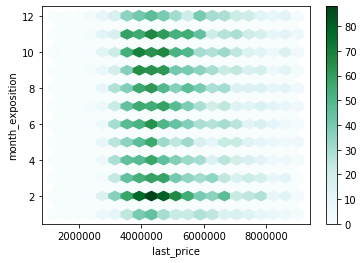

In [260]:
# зависимость очень слабая, но проверим ячеистой диаграммой
data_process_Spb.plot(x='last_price', y='month_exposition', kind='hexbin', gridsize=20, sharex=False)

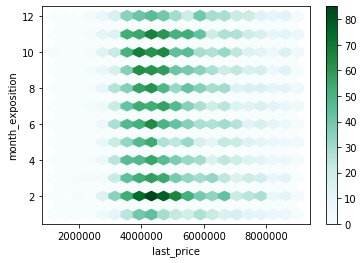

In [261]:
# зависимость очень слабая, но проверим ячеистой диаграммой
data_process_Spb_centr.plot(x='last_price', y='month_exposition', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Также, как и в предыдущих пунктах, коэффициенты в центре чуть-чуть выше, чем в общем по городу

In [262]:
# year_exposition
data_process_Spb['last_price'].corr(data_process_Spb['year_exposition'])
print('Коэффициент корреляции по всему городу:',data_process_Spb['last_price'].corr(data_process_Spb['year_exposition']))
print('Коэффициент корреляции по центру:',data_process_Spb_centr['last_price'].corr(data_process_Spb_centr['year_exposition']))

Коэффициент корреляции по всему городу: 0.07071216729490029
Коэффициент корреляции по центру: 0.06963437491797962


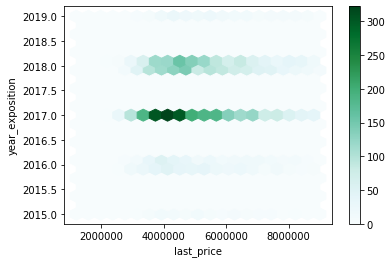

In [263]:
data_process_Spb.plot(x='last_price', y='year_exposition', kind='hexbin', gridsize=20, sharex=False)

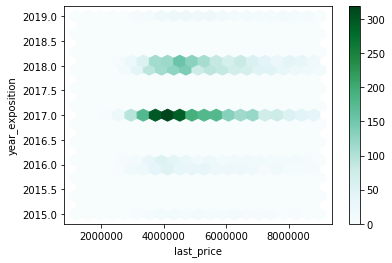

In [264]:
data_process_Spb_centr.plot(x='last_price', y='year_exposition', kind='hexbin', gridsize=20, sharex=False)

**Вывод**

Здесь впервые коэффициен по городу выше, чем по центральной области. Года по прежнему 2017 и 2018 самые активные 

## Общий вывод

Проводя исследование, было выявлено несколько закономерностей и зависимостей. 

Изначальные данные были предобработаны, удалены некоторые пропуски, некоторые пропуски заменены на средние или медианные значения, также была создан новый датафрейм, в катором были устранены все выбросы и аномальные значения (такие, как высота потолков в 20 м или кол-во комнат 900). По этому датафрейму производилось дальнейшее исследование. 

Было выявлено 10 населенных пунктов с наибольшим количество объявлений. Санкт-Петербург оказался крупнейшим населенным пунктом, также он был рассмотрен на закономерности и поделен на две группы: в целом по городу, и по центру. Это было посчитано с помощью нахождения средней цены по каждому километру удаленности от центра. Здесь было выяснено, что в квартиры в центре незначительно, но выше, по всем показателям, в отличии от города. Единственный параметр, в котором город незначительно обходит центр - это год продажи объявлений, но это логично, т.к. в целом по городу квартир продавалось больше, чем по центру, поэтому и продаж в среднем в год было больше.